# Reinforcement Learning - Donkey Kong

## Imports

In [1]:
import gymnasium as gym
import gym
import random
import time


import numpy as np
import matplotlib.pyplot as plt
from collections import deque


## Enviroment Setup

In [2]:
env = gym.make('ALE/DonkeyKong-v5', render_mode='rgb_array')
height, width, channels = env.observation_space.shape
actions = env.action_space

Action Space: Discrete(18)
State space: Box(0, 255, (210, 160, 3), uint8)


C:\Users\lowie\.virtualenvs\Project-46Jsvre_\Lib\site-packages\gym\utils\passive_env_checker.py:289: UserWarning: WARN: No render fps was declared in the environment (env.metadata['render_fps'] is None or not defined), rendering may occur at inconsistent fps.
  logger.warn(


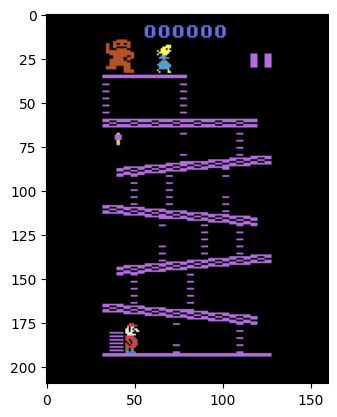

In [3]:
print("Action Space: {}".format(env.action_space))
print("State space: {}".format(env.observation_space))
env.reset()
img = plt.imshow(env.render())

In [4]:
action_meanings = env.unwrapped.get_action_meanings()
num_actions = len(action_meanings)
print(f"Action Meanings: {action_meanings}, Total Actions: {num_actions}")


Action Meanings: ['NOOP', 'FIRE', 'UP', 'RIGHT', 'LEFT', 'DOWN', 'UPRIGHT', 'UPLEFT', 'DOWNRIGHT', 'DOWNLEFT', 'UPFIRE', 'RIGHTFIRE', 'LEFTFIRE', 'DOWNFIRE', 'UPRIGHTFIRE', 'UPLEFTFIRE', 'DOWNRIGHTFIRE', 'DOWNLEFTFIRE'], Total Actions: 18


In [5]:
import gym
from gym.wrappers import RecordVideo

# Define the directory for video recording
directory = './video_random_donkeykong'

# Create the DonkeyKong environment (replace 'ALE/DonkeyKong-v5' with your specific environment name)
env = gym.make('ALE/DonkeyKong-v5', render_mode='human')

# Wrap the environment with video recording capability
env = RecordVideo(env, video_folder=directory)

# Initialize variables
epochs = 0
rewards = 0
state = env.reset()
done = False

# Run the environment until termination
while not done:
    # Perform a random action
    action = env.action_space.sample()
    step_result = env.step(action)

    # Unpack the step result
    if isinstance(step_result, tuple) and len(step_result) >= 3:
        observation, reward, done, info = step_result[:4]  # Take the first four elements

        # Accumulate rewards and count epochs/steps
        rewards += reward
        epochs += 1
    else:
        break  # Exit the loop if the step result is unexpected

# Print the number of steps taken
print(f"Number of steps: {epochs}")

# Close the environment and finalize video recording
env.close()


C:\Users\lowie\.virtualenvs\Project-46Jsvre_\Lib\site-packages\gym\wrappers\record_video.py:75: UserWarning: WARN: Overwriting existing videos at C:\Users\lowie\OneDrive - Hogeschool West-Vlaanderen\Documenten\Howest\Howest jaar 2\S2\Reinfocement Learning\Project\video_random_donkeykong folder (try specifying a different `video_folder` for the `RecordVideo` wrapper if this is not desired)
  logger.warn(
C:\Users\lowie\.virtualenvs\Project-46Jsvre_\Lib\site-packages\gym\wrappers\monitoring\video_recorder.py:59: UserWarning: WARN: Disabling video recorder because environment <OrderEnforcing<PassiveEnvChecker<AtariEnv<ALE/DonkeyKong-v5>>>> was not initialized with any compatible video mode between `rgb_array` and `rgb_array_list`
  logger.warn(
C:\Users\lowie\.virtualenvs\Project-46Jsvre_\Lib\site-packages\gym\utils\passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


Number of steps: 632


In [6]:
'''
env = gym.make("ALE/DonkeyKong-v5", render_mode="human")
observation, info = env.reset(seed=42)
for _ in range(1000):
    action = env.action_space.sample()  # this is where you would insert your policy
    observation, reward, terminated, truncated, info = env.step(action)

    if terminated or truncated:
        observation, info = env.reset()

env.close()
'''

'\nenv = gym.make("ALE/DonkeyKong-v5", render_mode="human")\nobservation, info = env.reset(seed=42)\nfor _ in range(1000):\n    action = env.action_space.sample()  # this is where you would insert your policy\n    observation, reward, terminated, truncated, info = env.step(action)\n\n    if terminated or truncated:\n        observation, info = env.reset()\n\nenv.close()\n'